In [3]:
#Import libraries
import os
import pydicom
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
def filter_image (textfile, img_dir, msk_dir, size = (220, 256, 256), mask_threshold = 50000000):
    with open(textfile) as f:
        content = f.readlines()
    normal_namelist = [x.strip() for x in content]

    #Get good image names
    files = os.listdir(img_dir)
    img_name_list = []
    for filename in files:
        if filename in normal_namelist:
            img_name_list.append(filename)
    #print(img_name_list, normal_namelist)
    #Get corresponding masks names, delete from both name lists if mask does not exists
    msk_name_list = []
    invalid_img_list = []
    total_mask_pixel = np.array([])
    for filename in img_name_list:   #correspond images loaded
        img_namesplt = filename.split('.')
        msk_name = img_namesplt[0]+'.result.dcm'
        #print(msk_name)
        try:
            mask = pydicom.read_file(os.path.join(msk_dir, msk_name))
        except:
            #print(filename + " does not have a result dicom file in the mask folder! will delete that from image lists")
            invalid_img_list.append(filename)
        else:
            #total_mask_pixel = np.append (total_mask_pixel, mask.pixel_array.sum())
            #print(mask[0].pixel_array.sum(), mask[1])
            print(mask.pixel_array.shape)
            if mask.pixel_array.shape == size and mask.pixel_array.sum() < mask_threshold:           
                msk_name_list.append(msk_name)
            else: 
                invalid_img_list.append(filename)
            
 #   print(mask, mask.pixel_array.sum())
    for filename in invalid_img_list:
        img_name_list.remove(filename) 
    plt.hist(total_mask_pixel)

    return img_name_list, msk_name_list

(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
['A071.dcm', 'A030.dcm', 'A082.dcm', 'A010.dcm', 'A073.dcm', 'A040.dcm', 'A027.dcm', 'A022.dcm', 'A066.dcm', 'A091.dcm', 'A123.dcm', 'A133.dcm', 'A088.dcm', 'A135.dcm', 'A070.dcm', 'A056.dcm', 'A137.dcm']


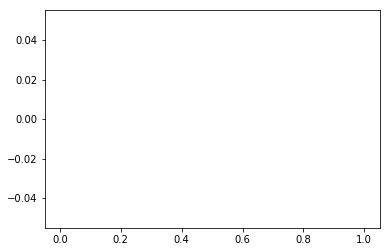

In [34]:
# Load data and masks as dicom files
data_dir = '../../data'                   #Please change the path accordingly before make any changes
normalnames = data_dir + '/normal_256auto.txt'
img_dir = data_dir + '/256Auto/images'
msk_dir = data_dir + '/256Auto/masks'

image_name_list, mask_name_list = filter_image(normalnames, img_dir, msk_dir)
print(image_name_list)